# 통계

In [1]:
# Jupyter Notebook 설정 : 모든 결과 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import pandas as pd

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('display.float_format', '{:,.3f}'.format)

'%.3f'

In [3]:
df = pd.read_csv('scores_em.csv', index_col='student number')
scores = np.array(df['english'])[:10]
scores_df = pd.DataFrame({'score': scores}, index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## 데이터 중심의 지표

### 평균

In [4]:
average = sum(scores) / len(scores)
s = scores_df.mean()
print(average)
print(np.mean(scores))
print(type(s))
print(s)

55.0
55.0
<class 'pandas.core.series.Series'>
score   55.000
dtype: float64


### 중앙값

In [5]:
sorted_scores = np.sort(scores)
sorted_scores
scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [6]:
n = len(sorted_scores)
if n % 2 == 0:
    # 데이터 개수가 짝수인 경우
    median = (sorted_scores[n // 2 - 1] + sorted_scores[n // 2]) / 2
else:
    # 데이터 개수가 홀수인 경우
    median = sorted_scores[n // 2 - 1]
median

56.500

In [7]:
np.median(scores)
scores_df.median()

56.500

score   56.500
dtype: float64

### 최빈값

In [8]:
s1 = pd.Series([1, 1, 1, 2, 2, 3]).mode() # 최빈값이 하나인 경우
s2 = pd.Series([1, 1, 1, 2, 2, 2, 3]).mode() # 최빈값이 두개인 경우
s3 = pd.Series([1,2,3,4,5]).mode() # 최빈값이 없는 경우
print(type(s1))
print(s1)
print(s2)
print(s3)

<class 'pandas.core.series.Series'>
0    1
dtype: int64
0    1
1    2
dtype: int64
0    1
1    2
2    3
3    4
4    5
dtype: int64


## 데이터의 산포도 지표

### 편차

In [9]:
mean = np.mean(scores)
deviation = scores - mean
mean
deviation
np.mean(deviation)

55.000

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

0.000

In [10]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_mean
another_deviation
np.mean(another_deviation)

55.000

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

0.000

In [11]:
summary_df = scores_df.copy()
summary_df['divation'] = deviation
summary_df.mean()
summary_df

score      55.000
divation    0.000
dtype: float64

,score,divation
student,,
A,42,-13.000
B,69,14.000
C,56,1.000
D,41,-14.000
E,57,2.000
F,48,-7.000
G,65,10.000
H,49,-6.000
I,65,10.000


### 분산 (var)

In [12]:
np.mean(deviation**2)
np.var(scores)
scores_df.var()

86.000

86.000

score   95.556
dtype: float64

In [13]:
summary_df['square of deviation'] = np.square(deviation)
summary_df.mean()
summary_df

score                 55.000
divation               0.000
square of deviation   86.000
dtype: float64

,score,divation,square of deviation
student,,,
A,42,-13.000,169.000
B,69,14.000,196.000
C,56,1.000,1.000
D,41,-14.000,196.000
E,57,2.000,4.000
F,48,-7.000,49.000
G,65,10.000,100.000
H,49,-6.000,36.000
I,65,10.000,100.000


### 표준편차 (std)

In [14]:
np.sqrt(np.var(scores, ddof=0))
np.std(scores, ddof=0)

9.274

9.274

## 범위와 4분위수

### 범위 (최대값 - 최소값)

In [15]:
np.max(scores) - np.min(scores)

np.int64(28)

### 4분위수

In [16]:
Q1 = np.percentile(scores, 25)
Q3 = np.percentile(scores, 75)
IQR = Q3 - Q1
IQR

15.000

## 데이터 지표 정리

In [17]:
pd.Series(scores).describe()

count   10.000
mean    55.000
std      9.775
min     41.000
25%     48.250
50%     56.500
75%     63.250
max     69.000
dtype: float64

## 데이터의 정규화

### 표준화 : Z = (값 - 평균) / 표준편차

In [18]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [19]:
np.mean(z), np.std(z, ddof=0)

(-0.000, 1.000)

### 편차값

In [20]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


## 데이터의 시각화

### 도수분포표

In [21]:
english_scores = df['english']
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [22]:
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
freq_dist_df = pd.DataFrame({'frequency': freq}, index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [23]:
class_value = [(i + (i + 10)) // 2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [24]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [25]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [26]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.000,0.000
10~20,0,15,0.000,0.000
20~30,0,25,0.000,0.000
30~40,2,35,0.040,0.040
40~50,8,45,0.160,0.200
50~60,16,55,0.320,0.520
60~70,18,65,0.360,0.880
70~80,6,75,0.120,1.000
80~90,0,85,0.000,1.000


### 최빈값 재검토

In [27]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

np.int64(65)

### 히스토그램

In [28]:
import matplotlib.pyplot as plt

# plt.show() 동작 방법 변경 (window >> jupyter notebook)
%matplotlib inline 

Text(0.5, 0, 'English Score')

Text(0, 0.5, 'Frequency')

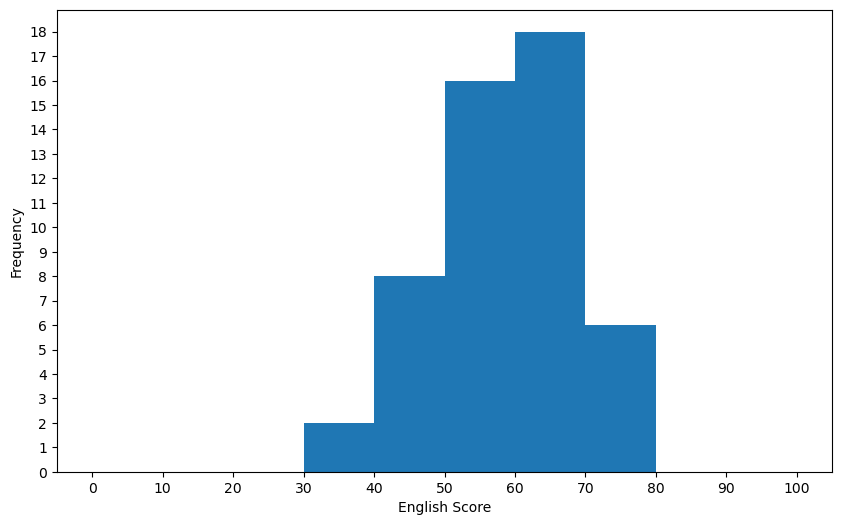

In [29]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
ax.set_xlabel('English Score')
ax.set_ylabel('Frequency')
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

Text(0.5, 0, 'English Score')

Text(0, 0.5, 'Frequency')

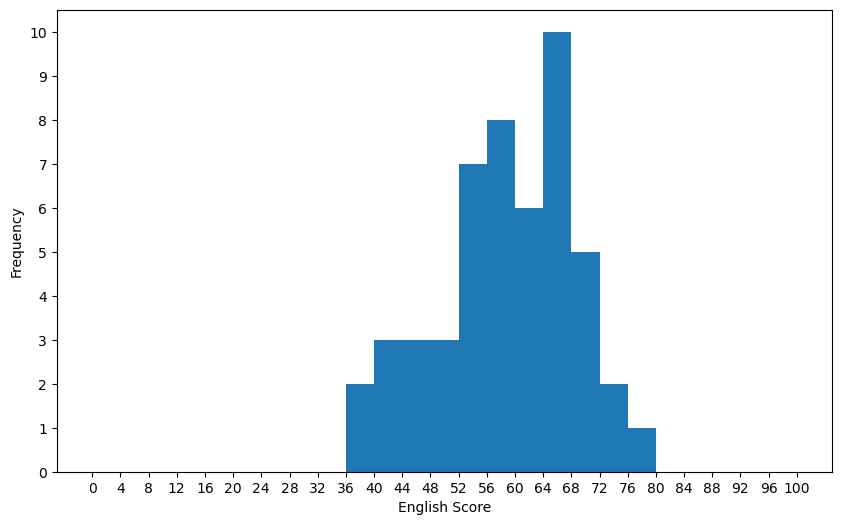

In [30]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('English Score')
ax.set_ylabel('Frequency')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

Text(0.5, 0, 'score')

Text(0, 0.5, 'relative frequency')

Text(0, 0.5, 'cumulative relative frequency')

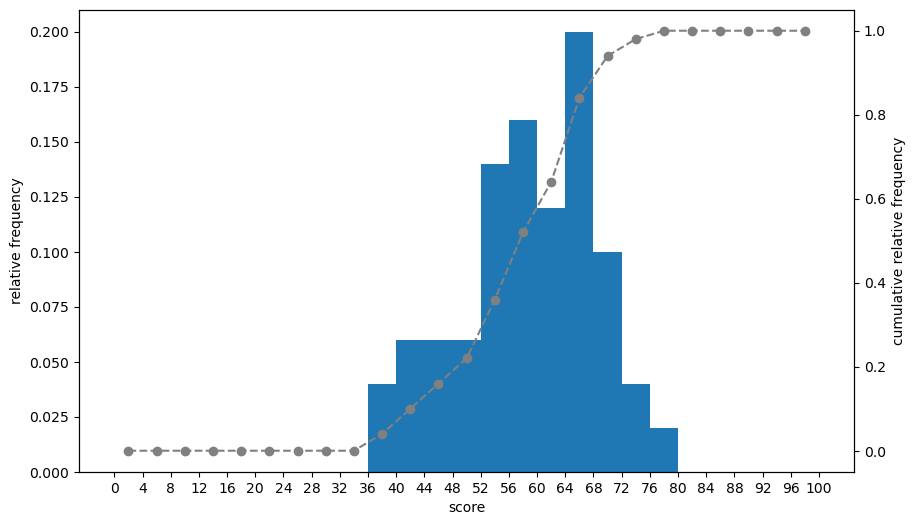

In [31]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

# 상대도수 히스토그램 작성을 위한 가중치 계산
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0, 100), weights=weights)

# 누적상대도수 계산 및 계급값 설정
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i + (i + 4)) // 2 for i in range(0, 100, 4)]

# 누적상대도수 꺾은선 그래프 시각화
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')
ax2.grid(visible=False)

# 축 레이블 및 눈금 설정
ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25 + 1))

plt.show()

### 상자그림

C:\Users\User\AppData\Local\Temp\ipykernel_18296\2716257080.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(english_scores, labels=['english'])


{'whiskers': [<matplotlib.lines.Line2D at 0x2762025a350>,
 'caps': [<matplotlib.lines.Line2D at 0x2762025a5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2762025a210>],
 'medians': [<matplotlib.lines.Line2D at 0x2762025a850>],
 'fliers': [<matplotlib.lines.Line2D at 0x2762025a990>],
 'means': []}

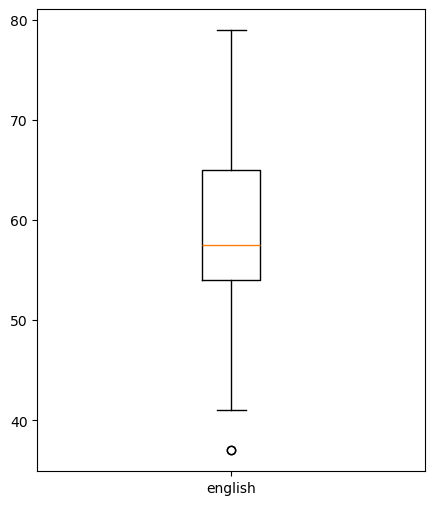

In [32]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])
plt.show()